# 6. Pandas로 시계열 데이터 다루기

--
## 시계열 데이터관련 Pandas 기능 연습
- 소스 : https://datascienceschool.net/01%20python/04.08%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EC%9E%90%EB%A3%8C%20%EB%8B%A4%EB%A3%A8%EA%B8%B0.html

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline

### DatetimeIndex

In [119]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [120]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

In [121]:
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [122]:
pd.date_range(start="2018-4-1", periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

`freq` 파라미터는 다음을 사용할 수 있다.
- s: 초
- T: 분
- H: 시간
- D: 일(day)
- B: 주말이 아닌 평일
- W: 주(일요일)
- W-MON: 주(월요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날


In [123]:
pd.date_range(start="2018-4-1", periods=30, freq='H')

DatetimeIndex(['2018-04-01 00:00:00', '2018-04-01 01:00:00',
               '2018-04-01 02:00:00', '2018-04-01 03:00:00',
               '2018-04-01 04:00:00', '2018-04-01 05:00:00',
               '2018-04-01 06:00:00', '2018-04-01 07:00:00',
               '2018-04-01 08:00:00', '2018-04-01 09:00:00',
               '2018-04-01 10:00:00', '2018-04-01 11:00:00',
               '2018-04-01 12:00:00', '2018-04-01 13:00:00',
               '2018-04-01 14:00:00', '2018-04-01 15:00:00',
               '2018-04-01 16:00:00', '2018-04-01 17:00:00',
               '2018-04-01 18:00:00', '2018-04-01 19:00:00',
               '2018-04-01 20:00:00', '2018-04-01 21:00:00',
               '2018-04-01 22:00:00', '2018-04-01 23:00:00',
               '2018-04-02 00:00:00', '2018-04-02 01:00:00',
               '2018-04-02 02:00:00', '2018-04-02 03:00:00',
               '2018-04-02 04:00:00', '2018-04-02 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [124]:
pd.date_range("2018-4-1", "2018-12-31", freq="MS")

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

### shift 연산

In [125]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2018-1-1", periods=4, freq="M"))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [126]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [127]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

In [128]:
ts.shift(1, freq="M")

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [129]:
ts.shift(1, freq="W")

2018-02-04    1.764052
2018-03-04    0.400157
2018-04-01    0.978738
2018-05-06    2.240893
dtype: float64

### resample 연산

In [130]:
ts = pd.Series(np.random.randn(100), index=pd.date_range(
    "2018-1-1", periods=100, freq="D"))
ts.tail(20)

2018-03-22    1.488252
2018-03-23    1.895889
2018-03-24    1.178780
2018-03-25   -0.179925
2018-03-26   -1.070753
2018-03-27    1.054452
2018-03-28   -0.403177
2018-03-29    1.222445
2018-03-30    0.208275
2018-03-31    0.976639
2018-04-01    0.356366
2018-04-02    0.706573
2018-04-03    0.010500
2018-04-04    1.785870
2018-04-05    0.126912
2018-04-06    0.401989
2018-04-07    1.883151
2018-04-08   -1.347759
2018-04-09   -1.270485
2018-04-10    0.969397
Freq: D, dtype: float64

- 다운샘플링 (데이터 양이 감소하는 방향)

In [132]:
ts.resample('W').mean()

2018-01-07    0.305776
2018-01-14    0.629064
2018-01-21   -0.006910
2018-01-28    0.277065
2018-02-04   -0.144972
2018-02-11   -0.496299
2018-02-18   -0.474473
2018-02-25   -0.201222
2018-03-04   -0.775142
2018-03-11    0.052868
2018-03-18   -0.450379
2018-03-25    0.601892
2018-04-01    0.334893
2018-04-08    0.509605
2018-04-15   -0.150544
Freq: W-SUN, dtype: float64

In [133]:
ts.resample('M').first()

2018-01-31    1.867558
2018-02-28    0.156349
2018-03-31   -1.726283
2018-04-30    0.356366
Freq: M, dtype: float64

In [134]:
ts.resample('W').ohlc()

,open,high,low,close
2018-01-07,1.867558,1.867558,-0.977278,0.144044
2018-01-14,1.454274,1.494079,-0.205158,-0.205158
2018-01-21,0.313068,2.269755,-2.552990,2.269755
2018-01-28,-1.454366,1.532779,-1.454366,0.378163
2018-02-04,-0.887786,1.230291,-1.980796,-0.387327
2018-02-11,-0.302303,1.950775,-1.706270,-0.438074
2018-02-18,-1.252795,0.777490,-1.613898,-0.510805
2018-02-25,-1.180632,0.428332,-1.180632,-0.362741
2018-03-04,-0.672460,0.177426,-1.726283,-1.630198
2018-03-11,0.462782,1.139401,-1.234826,-1.234826


- 업샘플링 (데이터양 증가 방향)

In [136]:
ts.resample('4H').ffill().head(20)

2018-01-01 00:00:00    1.867558
2018-01-01 04:00:00    1.867558
2018-01-01 08:00:00    1.867558
2018-01-01 12:00:00    1.867558
2018-01-01 16:00:00    1.867558
2018-01-01 20:00:00    1.867558
2018-01-02 00:00:00   -0.977278
2018-01-02 04:00:00   -0.977278
2018-01-02 08:00:00   -0.977278
2018-01-02 12:00:00   -0.977278
2018-01-02 16:00:00   -0.977278
2018-01-02 20:00:00   -0.977278
2018-01-03 00:00:00    0.950088
2018-01-03 04:00:00    0.950088
2018-01-03 08:00:00    0.950088
2018-01-03 12:00:00    0.950088
2018-01-03 16:00:00    0.950088
2018-01-03 20:00:00    0.950088
2018-01-04 00:00:00   -0.151357
2018-01-04 04:00:00   -0.151357
Freq: 4H, dtype: float64

In [137]:
ts.resample('4H').bfill().head(20)

2018-01-01 00:00:00    1.867558
2018-01-01 04:00:00   -0.977278
2018-01-01 08:00:00   -0.977278
2018-01-01 12:00:00   -0.977278
2018-01-01 16:00:00   -0.977278
2018-01-01 20:00:00   -0.977278
2018-01-02 00:00:00   -0.977278
2018-01-02 04:00:00    0.950088
2018-01-02 08:00:00    0.950088
2018-01-02 12:00:00    0.950088
2018-01-02 16:00:00    0.950088
2018-01-02 20:00:00    0.950088
2018-01-03 00:00:00    0.950088
2018-01-03 04:00:00   -0.151357
2018-01-03 08:00:00   -0.151357
2018-01-03 12:00:00   -0.151357
2018-01-03 16:00:00   -0.151357
2018-01-03 20:00:00   -0.151357
2018-01-04 00:00:00   -0.151357
2018-01-04 04:00:00   -0.103219
Freq: 4H, dtype: float64

### dt 접근자

In [138]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [139]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [140]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

In [141]:
s.dt.strftime("%Y년 %m월 %d일")

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

---
## 간단한 시계열 예측모델 만들기

### 데이터 준비

In [169]:
ts = pd.DataFrame(np.random.randint(1,100,100), index=pd.date_range(
    "2018-1-1", periods=100, freq="D"))
ts.tail(20)


,0
2018-03-22,82
2018-03-23,71
2018-03-24,7
2018-03-25,49
2018-03-26,10
2018-03-27,29
2018-03-28,78
2018-03-29,57
2018-03-30,10
2018-03-31,86


In [170]:
ts['t-1'] = ts.shift(1)
ts['t-2'] = ts['t-1'].shift(1)
ts['t-3'] = ts['t-2'].shift(1)
ts['t-4'] = ts['t-3'].shift(1)

ts

,0,t-1,t-2,t-3,t-4
2018-01-01,20,NaN,NaN,NaN,NaN
2018-01-02,82,20.0,NaN,NaN,NaN
2018-01-03,17,82.0,20.0,NaN,NaN
2018-01-04,72,17.0,82.0,20.0,NaN
2018-01-05,25,72.0,17.0,82.0,20.0
...,...,...,...,...,...
2018-04-06,75,65.0,29.0,37.0,10.0
2018-04-07,14,75.0,65.0,29.0,37.0
2018-04-08,3,14.0,75.0,65.0,29.0
2018-04-09,38,3.0,14.0,75.0,65.0


In [172]:
ts.dropna(inplace=True)
ts

,0,t-1,t-2,t-3,t-4
2018-01-05,25,72.0,17.0,82.0,20.0
2018-01-06,12,25.0,72.0,17.0,82.0
2018-01-07,23,12.0,25.0,72.0,17.0
2018-01-08,61,23.0,12.0,25.0,72.0
2018-01-09,92,61.0,23.0,12.0,25.0
...,...,...,...,...,...
2018-04-06,75,65.0,29.0,37.0,10.0
2018-04-07,14,75.0,65.0,29.0,37.0
2018-04-08,3,14.0,75.0,65.0,29.0
2018-04-09,38,3.0,14.0,75.0,65.0


- 학습데이터셋과 테스트셋 분리

In [199]:
X_train = ts.iloc[:70,1:]
X_test  = ts.iloc[70:,1:]
y_train = ts.iloc[:70,0]
y_test  = ts.iloc[70:,0]

### 의사결정트리 알고리즘 적용

In [200]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [213]:
y_pred = pd.DataFrame(tree_clf.predict(X_test), index=y_test.index)

### 예측결과 시각화

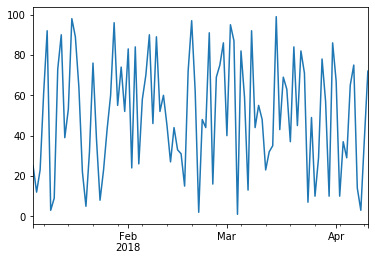

In [214]:
import matplotlib.pyplot as plt

ts[0].plot()
plt.show()

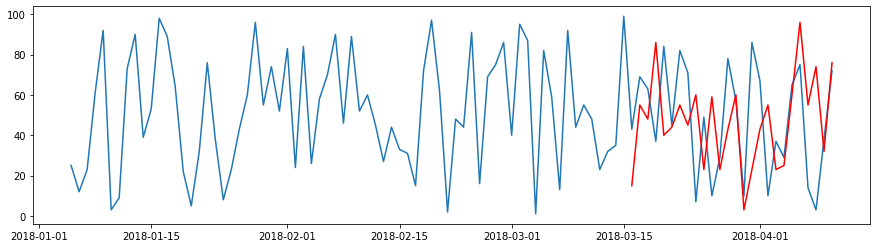

In [228]:
plt.figure(figsize=(15,4))
plt.plot(ts[0])
plt.plot(y_pred, c='r')
plt.show()